In [1]:
# %pip install -r requirements.txt
# %pip install pandas
# %pip install anndata
# %pip install scanpy

              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450


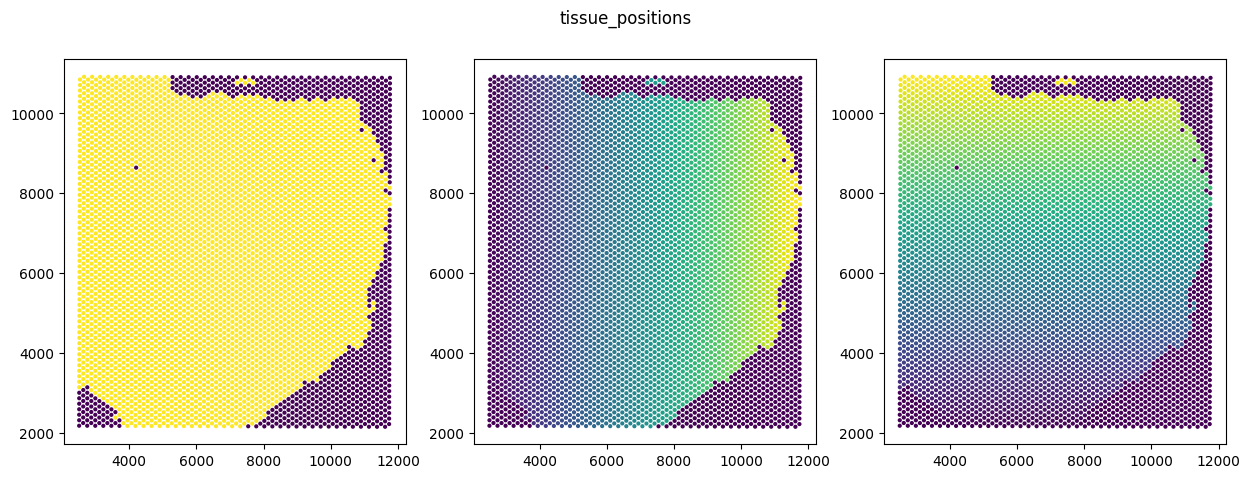

In [2]:
import os
import csv
import numpy as np
import scanpy as sc
import pandas as pd
from anndata import AnnData
import matplotlib.pyplot as plt

# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# Display the dataframe
print(df.head())
#display the 3 graps of the dataframe
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('tissue_positions')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 4)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['xgrad']), cmap = 'viridis', s = 4)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['ygrad']), cmap = 'viridis', s = 4)
plt.show()

              barcode layer_guess
0  AAACAACGAATAGTTC-1          -1
1  AAACAAGTATCTCCCA-1          L3
2  AAACAATCTACTAGCA-1          L1
3  AAACACCAATAACTGC-1          WM
4  AAACAGCTTTCAGAAG-1          L6
              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450
{'L1', 'L3', 'WM', 'L5', 'L6', '-1', 'L2', 'L4'}
              barcode  present  xgrad  ygrad     x     y layer_guess
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450    

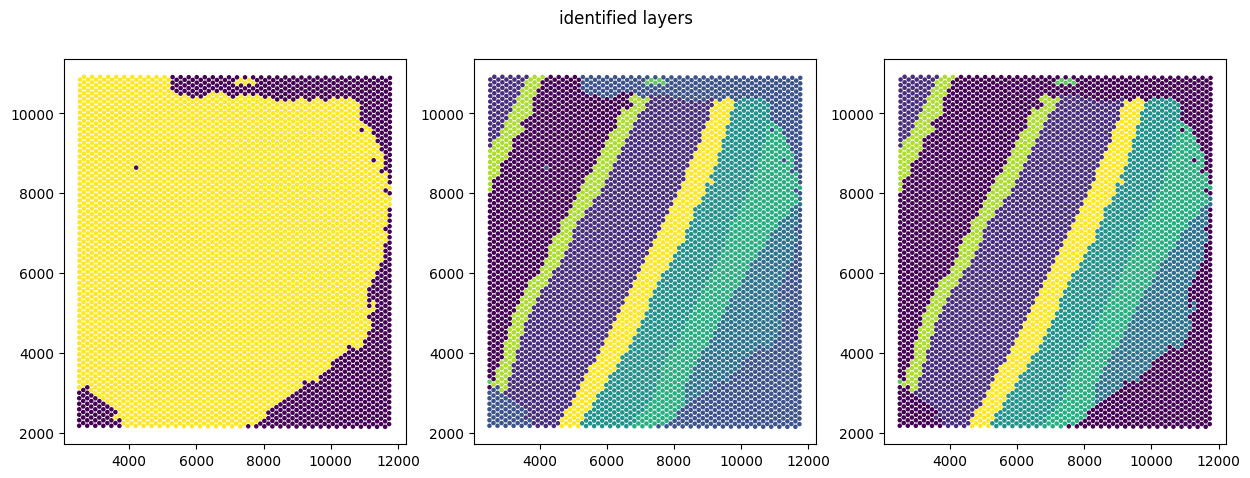

In [3]:
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = 'data\data1\metadata.tsv'
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# Display the dataframe
print(metadata.head())
print(df.head())
layers = set(metadata['layer_guess'])
print(layers)

#if barcode in df['barcode'] matches a barcode in metadata['barcode'], then add the meta['layer_guess'] to df['layer_guess'] else put NAN
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#assign a df['color'] to each in set(df['layer_guess'])
colors = set(df['layer_guess'])
print(df.head())
print(colors)
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('identified layers')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 5)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['color']), cmap = 'viridis', s = 5)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['color']), cmap = 'viridis', s = 5)
plt.show()

In [4]:
df.head()

barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      2
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      2
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      2
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      2
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      2

In [5]:
def showadata(adata):
    print('\nAdata obs: \n', adata.obs,'\n')
    print('\nGround truth layers: \n',set(adata.obs['ground_truth']))
    print('\nGround truth batch: \n',set(adata.obs['batch']))
    print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
    print(adata.obsm)

def addspatial(adata):
    obs_names = adata.obs.index.tolist()
    barcode_adata , unkownno_adata , adata_lyrguess , adata_grpguess = [],[],[],[]
    for obs in obs_names:
        seg = obs.split('_')
        barcode_adata.append(seg[0])
        unkownno_adata.append(seg[1])
        adata_lyrguess.append(seg[2].split('-')[0])
    adata.obs['barcode'] = barcode_adata
    adata.obs['unkownno'] = unkownno_adata
    adata.obs['adata_lyrguess'] = adata_lyrguess
    # showadata(adata)
    # print('\nADATA uniqno:', set(adata.obs['unkownno']))
    # print('\nADATA uniqlyr:', set(adata.obs['adata_lyrguess']))
    return adata

def showadata_h5(adata):
    print('\nAdata obs: \n', adata.obs.head(),'\n')
    print('\nAdata vars: \n', adata.var.head(),'\n')
    print('\nAdata uns: \n',adata.uns.keys(),'\n')
    print('\nAdata obsm: \n', adata.obsm,'\n')
    # print('\nGround truth batch: \n',set(adata.obs['batch']))
    # print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
    # print(adata.obsm)

def showobs_h5(adata):
    # print(adata_h5.uns)
    # adata_h5.uns['spatial'].keys()
    print(adata_h5.uns['spatial']['151507'].keys())
    # adata_h5.uns['spatial']['151507'].keys()
    print(adata_h5.uns['spatial']['151507']['images'].keys())
    # adata_h5.uns['spatial']['151507']['images'].keys()
    print(adata_h5.uns['spatial']['151507']['images']['hires'].shape)
    # adata_h5.uns['spatial']['151507']['images']['hires'].shape
    print(adata_h5.uns['spatial']['151507']['images']['lowres'].shape)
    # adata_h5.uns['spatial']['151507']['images']['lowres'].shape
    print(adata_h5.uns['spatial']['151507']['scalefactors'].keys())
    # adata_h5.uns['spatial']['151507']['scalefactors'].keys()
    print(adata_h5.uns['spatial']['151507']['scalefactors']['tissue_hires_scalef'])
    # adata_h5.uns['spatial']['151507']['scalefactors']['tissue_hires_scalef']
    print(adata_h5.uns['spatial']['151507']['metadata'])


In [122]:
adata_h5 = sc.read_visium('data\data1', count_file = "filtered_feature_bc_matrix.h5", source_image_path = 'data\data1')

sc.pp.filter_genes(adata_h5, min_cells=1)
sc.pp.filter_cells(adata_h5, min_genes=200)
sc.pp.normalize_total(adata_h5, target_sum=1e4)
sc.pp.log1p(adata_h5)

df_meta = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df_meta['layer_guess'] = df_meta['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
colors = set(df_meta['layer_guess'])
df_meta['label'] = df_meta['layer_guess'].apply(lambda x: list(colors).index(x))
h5_barcodes = adata_h5.obs.index.tolist()
adata_h5.obs['label'] = df_meta['label'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['present'] = df_meta['present'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['x'] = df_meta['x'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['y'] = df_meta['y'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['xgrad'] = df_meta['xgrad'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['ygrad'] = df_meta['ygrad'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['layer_guess'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values

d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [123]:
spatial = adata_h5.obsm['spatial']
type(spatial.max())

str

In [124]:
showadata_h5(adata_h5)


Adata obs: 
                    in_tissue array_row array_col  n_genes  label  present  \
AAACAACGAATAGTTC-1         1         0        16      727      0        1   
AAACAAGTATCTCCCA-1         1        50       102     2170      7        1   
AAACAATCTACTAGCA-1         1         3        43     1093      6        1   
AAACACCAATAACTGC-1         1        59        19     1896      0        1   
AAACAGCTTTCAGAAG-1         1        43         9     1620      0        1   

                       x     y  xgrad  ygrad layer_guess  
AAACAACGAATAGTTC-1  2513  3138      0     14          L1  
AAACAAGTATCTCCCA-1  2633  3207      1     15          L2  
AAACAATCTACTAGCA-1  2514  3276      0     16          -1  
AAACACCAATAACTGC-1  2634  3344      1     17          L1  
AAACAGCTTTCAGAAG-1  2514  3414      0     18          L1   


Adata vars: 
                     gene_ids    feature_types  genome  n_cells
MIR1302-2HG  ENSG00000243485  Gene Expression  GRCh38        1
AL627309.1   ENSG000002380

In [125]:
set(df['layer_guess'])

{'-1', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'WM', nan}

In [126]:
import cv2
img_size = 112
adata = adata_h5
df_meta = pd.read_csv(os.path.join('data\data1', 'metadata.tsv'), sep='\t')
label = adata.obs['label']
full_image = cv2.imread(os.path.join('data\data1', f'tissue_hires_image.png'))
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
patches = []
cord = list(zip(adata.obs['x'].tolist(), adata.obs['y'].tolist()))
for x, y in cord:
    x = int(0.1451*x - 55.79)
    y = int(-0.1597*y + 2108.8)
    patches.append(full_image[y-img_size:y+img_size, x-img_size:x+img_size])
patches = np.array(patches)
print(len(patches))
print(patches[3].shape)
print(patches[4000][:,:,1])

4218
(224, 224, 3)
[[126 175 142 ... 136 121  89]
 [148 131 151 ... 142 130 173]
 [127 165 145 ... 149 127 144]
 ...
 [125 127 131 ... 159 159 167]
 [151 140 137 ... 172 164 167]
 [151 118 154 ... 170 169 167]]


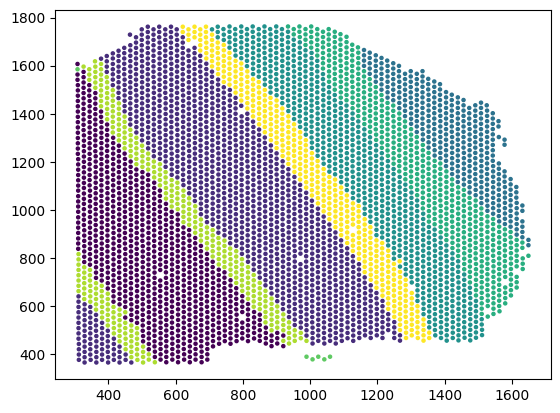

In [127]:
cord = list(zip(adata.obs['x'].tolist(), adata.obs['y'].tolist()))
xax, yax = [], []
for x, y in cord:
    xax.append(int(0.1451*x - 55.79))
    yax.append(int(-0.1597*y + 2108.8))
plt.scatter(xax, yax, c = adata.obs['label'], cmap = 'viridis', s = 5)

In [128]:
cv2.imshow('image',patches[3000][:,:,1])
cv2.waitKey(0)

-1

In [129]:
print(adata_h5.obs['x'].max(),
adata_h5.obs['x'].min(),
adata_h5.obs['y'].max(),
adata_h5.obs['y'].min(),)

11751 2513 10917 2160


In [130]:
full_image.shape

(2000, 2000, 3)

In [15]:
# def addspatial():
#     adata_h5 = adata.copy()
#     df = pd.read_csv(os.path.join('D:\Github\CS690\FinalProject\data\data1\subset\spatial', f'tissue_positions_list.csv'))  
#     metadata = pd.read_csv(os.path.join('D:\Github\CS690\FinalProject\data\data1\subset', f'metadata.tsv'),sep='\t')
#     layers = set(metadata['layer_guess'])
#     df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#     df_meta = df
#     label = pd.Categorical(df_meta['layer_guess']).codes
#     h5_barcodes = adata_h5.obs.index.tolist()
    # adata_h5.obs['label'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['present'] = df_meta['present'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['x'] = df_meta['x'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['y'] = df_meta['y'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['xgrad'] = df_meta['xgrad'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['ygrad'] = df_meta['ygrad'][df_meta['barcode'].isin(h5_barcodes)].values
    # adata_h5.obs['layer_guess'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values
    # return adata_h5

# adata_h5 = addspatial()

In [16]:
# sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')
# path = 'data\data1'
# adata = sc.read(os.path.join(path,f'DLPFC_single_cell_data_downsampled.h5ad'))
# adata_h5 = sc.read_visium(path, count_file = "filtered_feature_bc_matrix.h5", source_image_path = path)
# # df_meta = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# df = pd.read_csv(os.path.join(path,'spatial', f'tissue_positions_list.csv'))  
# metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# layers = set(metadata['layer_guess'])
# df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
# # df['color'] = df['layer_guess'].apply(lambda x: list(set(df['layer_guess'])).index(x))
# df_meta = df
# label = pd.Categorical(df_meta['layer_guess']).codes
# adata_h5ad = addspatial(adata) #add spatial info to adata, extract barcode, unkownno, adata_lyrguess

# h5_barcodes = adata_h5.obs.index.tolist()
# adata_h5.obs['label'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['present'] = df_meta['present'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['x'] = df_meta['x'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['y'] = df_meta['y'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['xgrad'] = df_meta['xgrad'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['ygrad'] = df_meta['ygrad'][df_meta['barcode'].isin(h5_barcodes)].values
# adata_h5.obs['layer_guess'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values

# # adata_h5.obs['pred'] = pred.array.astype(str)

In [131]:
print(adata_h5.shape)
print(adata_h5.var.head())
adata_h5.obs.head()

(4218, 21151)
                    gene_ids    feature_types  genome  n_cells
MIR1302-2HG  ENSG00000243485  Gene Expression  GRCh38        1
AL627309.1   ENSG00000238009  Gene Expression  GRCh38        6
AL669831.5   ENSG00000237491  Gene Expression  GRCh38       57
FAM87B       ENSG00000177757  Gene Expression  GRCh38        1
LINC00115    ENSG00000225880  Gene Expression  GRCh38       12


in_tissue array_row array_col  n_genes  label  present  \
AAACAACGAATAGTTC-1         1         0        16      727      0        1   
AAACAAGTATCTCCCA-1         1        50       102     2170      7        1   
AAACAATCTACTAGCA-1         1         3        43     1093      6        1   
AAACACCAATAACTGC-1         1        59        19     1896      0        1   
AAACAGCTTTCAGAAG-1         1        43         9     1620      0        1   

                       x     y  xgrad  ygrad layer_guess  
AAACAACGAATAGTTC-1  2513  3138      0     14          L1  
AAACAAGTATCTCCCA-1  2633  3207      1     15          L2  
AAACAATCTACTAGCA-1  2514  3276      0     16          -1  
AAACACCAATAACTGC-1  2634  3344      1     17          L1  
AAACAGCTTTCAGAAG-1  2514  3414      0     18          L1

In [132]:
print(adata_h5.var['feature_types'].head())
type(adata_h5.var['feature_types']['AL627309.1'])

MIR1302-2HG    Gene Expression
AL627309.1     Gene Expression
AL669831.5     Gene Expression
FAM87B         Gene Expression
LINC00115      Gene Expression
Name: feature_types, dtype: object


str

In [133]:
print(adata_h5.X.shape)
# print(adata_h5.X)
print(adata_h5.X[4030,3300].size)
# plt.scatter(np.linspace(0, 1, adata_h5.shape[0]), adata_h5.X[:,0], s = 5)
for i,j in range(adata_h5.shape[0],adata_h5.shape[1]):
    plt.scatter(i, j, c = adata_h5.X[i,j], s = 5)
plt.show()

(4218, 21151)
1


TypeError: cannot unpack non-iterable int object

In [78]:
# cord = list(zip(adata_h5.obs['x'].tolist(), adata_h5.obs['y'].tolist()))
# cord

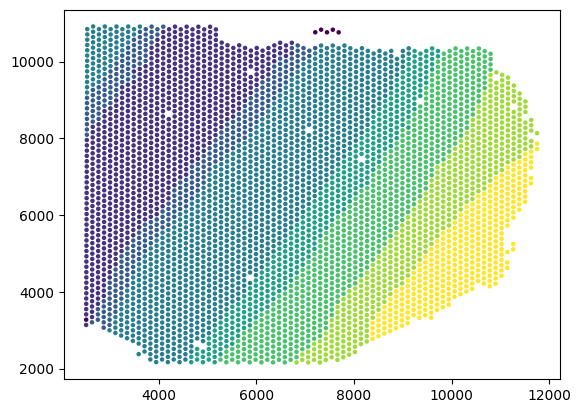

In [134]:
plt.scatter(adata_h5.obs['x'], adata_h5.obs['y'], c = pd.Categorical(adata_h5.obs['layer_guess']).codes, cmap = 'viridis', s = 5)
plt.show()

In [135]:
xg = np.load(os.path.join('data\embeddings',f'151507_xg.npy'))
xi = np.load(os.path.join('data\embeddings',f'151507_xi.npy'))
z = xg + 0.1*xi
print(z.shape)
print(adata_h5.shape)
adata_h5.obsm['ConGI'] = z
sc.pp.neighbors(adata_h5, use_rep='ConGI')
sc.tl.umap(adata_h5)
sc.pl.umap(adata_h5, color=['layer_guess'], size=10, legend_loc='right margin', palette='tab20')
sc.pl.umap(adata_h5, color=['x','y','xgrad','ygrad'], size=10, legend_loc='right margin', palette='tab20')

(4226, 64)
(4218, 21151)


ValueError: Value passed for key 'ConGI' is of incorrect shape. Values of obsm must match dimensions (0,) of parent. Value had shape (4226,) while it should have had (4218,).

In [136]:
adata_h5

AnnData object with n_obs × n_vars = 4218 × 21151
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'label', 'present', 'x', 'y', 'xgrad', 'ygrad', 'layer_guess'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [137]:
# print(adata_h5.obsm.keys())
# showadata_h5(adata_h5)
# print(adata_h5.uns['umap'])
# print(adata_h5.uns['umap']['params'])
# print(adata_h5.uns['neighbors'])
# print(adata_h5.uns.keys())
# print(adata_h5.uns['neighbors'].keys())
# print(adata_h5.uns['neighbors']['params'])
# print(adata_h5.uns['neighbors']['connectivities_key'])
print(adata_h5.obsm['ConGI'].shape)
# adata_h5.obsm['ConGI'][0]
# adata_h5.obsm['X_umap'][0]


KeyError: 'ConGI'

In [23]:
adata_h5.obsm['ConGI'][0:10,0:5]
# vec = adata_h5.obsm['ConGI'][:,0:10]
# vec = np.mean(vec,axis=1)
# sc.pl.umap(adata_h5, color=[vec], size=10, legend_loc='right margin', palette='tab20')

array([[-0.55242294,  1.0182328 ,  3.1839    ,  1.2573069 , -0.3348279 ],
       [-0.19708535, -0.15139353,  0.02747403,  0.2082556 , -0.01718359],
       [ 1.117155  ,  0.08230081,  1.6215928 ,  0.54727983,  1.6493006 ],
       [-0.6783914 ,  0.2167799 ,  1.5858941 ,  1.466289  ,  0.86016184],
       [ 0.01491459, -0.29879335,  0.45403385, -0.20938306,  0.496131  ],
       [ 0.01595331,  0.21615848,  0.12688774, -0.22155748,  0.6266215 ],
       [-0.27455813,  0.62711424,  0.33154806,  0.7267024 ,  0.658925  ],
       [-0.45410928, -0.2204201 , -0.17317201,  0.73684335, -0.28500366],
       [ 0.11525718, -0.29261753,  0.40823317,  0.03635505, -0.06608421],
       [-0.4349867 , -0.02552745,  0.1797252 ,  0.47001764,  0.0373777 ]],
      dtype=float32)

In [75]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming your matrix is named 'your_matrix'
your_matrix = z  # Replace this with your actual data

# Choose the number of clusters
n_clusters = 9  # Replace with your desired number of clusters

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(your_matrix)

cluster_labels = kmeans.labels_

print(cluster_labels)


d:\Github\CS690\FinalProject\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[7 1 8 ... 2 0 8]


In [96]:
cluster_labels

array([7, 1, 8, ..., 2, 0, 8])

In [76]:
print(set(cluster_labels))
cluster_labels[0]

{0, 1, 2, 3, 4, 5, 6, 7, 8}


7

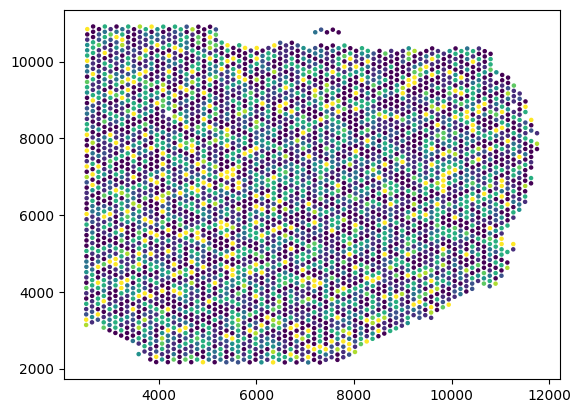

In [77]:
adata_h5
plt.scatter(adata_h5.obs['x'],adata_h5.obs['y'],c = cluster_labels,s=5)

In [85]:
%pip install leidenalg


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 656.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.6 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.6 MB 1.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.6 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 2.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.6 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 1.5/1.6 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.9 MB 12.3 MB/s eta 0:00:01
   -- ------------------------------

d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


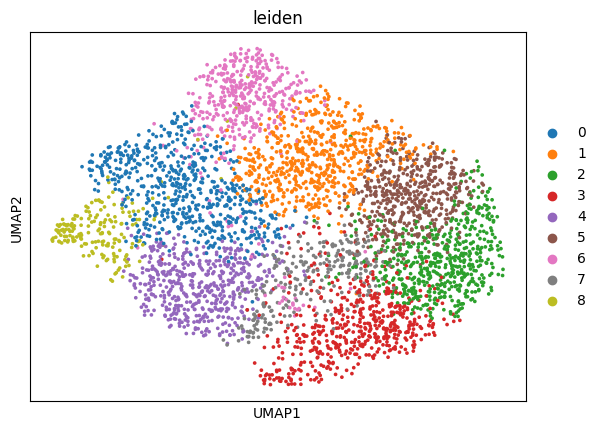

In [97]:
adata = adata_h5
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color='leiden')


In [98]:
adata

AnnData object with n_obs × n_vars = 4218 × 21151
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'present', 'x', 'y', 'xgrad', 'ygrad', 'layer_guess', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'neighbors', 'umap', 'layer_guess_colors', 'log1p', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'ConGI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [100]:
# set(adata.obs['leiden'])
adata.obs['leiden'] = np.array(adata.obs['leiden'])
adata.obs['leiden'].head()

AAACAACGAATAGTTC-1    6
AAACAAGTATCTCCCA-1    7
AAACAATCTACTAGCA-1    6
AAACACCAATAACTGC-1    8
AAACAGCTTTCAGAAG-1    3
Name: leiden, dtype: object

In [118]:
grps = [int(x) for x in adata.obs['leiden'].tolist()]
# grps

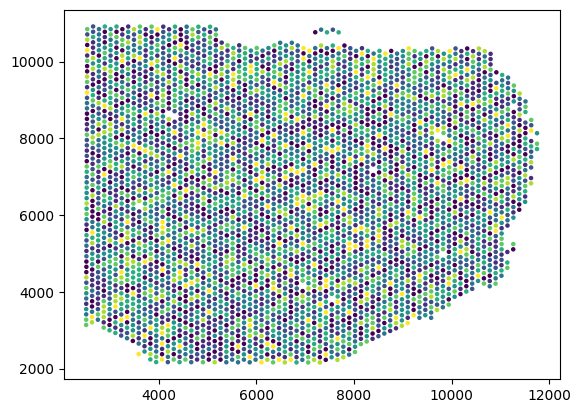

In [119]:
plt.scatter(adata.obs['x'],adata.obs['y'],c = [int(x) for x in adata.obs['leiden'].tolist()],s=5)

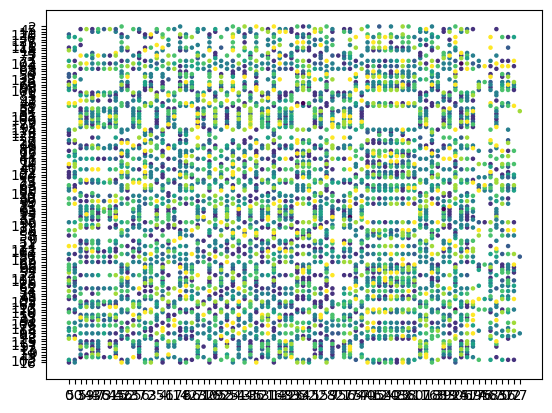

In [24]:
plt.scatter(adata_h5.obs['array_row'].tolist(), adata_h5.obs['array_col'].tolist(), c = pd.Categorical(adata_h5.obs['layer_guess']).codes, cmap = 'viridis', s = 5)